<h2>Trabalho de Conclusão de Disciplina

<h2>Big data, Data Analytics e Ferramentas de análise de Dados

<h3>Aluno: Vitor Henrique Nunciatelli - RA: 621203933

<h3>Pós Graduação - Especialização em IoT

<h2>Análise de temperatura de um data center

<img src='foto1.jpg' width = 300 align='left'>

Dispositivo IoT transmissor dos dados

<h3>Dados da tabela

- dataHora - Data e hora da captura do valor de temperatura
- ponto - Em qual rack foi realizado a medição de temperatura
- valorTemp - valor de temperatura obtido em °C

<h3>Importação de bibliotecas e dos dados da tabela .csv

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import matplotlib.dates as mdates
import matplotlib.dates as dates
import seaborn as sns

uri = ('medicaoSensores.csv')
tabela = pd.read_csv(uri, sep = ";", encoding = "UTF-8")

Exibindo a tabela

In [2]:
tabela.head(8000)

,dataHora,ponto,valorTemp
0,01/11/2021 00:03,RACK01,22.8
1,01/11/2021 00:12,RACK01,22.2
2,01/11/2021 00:17,RACK01,23.1
3,01/11/2021 00:21,RACK01,22.6
4,01/11/2021 00:26,RACK01,22.8
...,...,...,...
7520,30/11/2021 17:13,RACK01,21.5
7521,30/11/2021 17:18,RACK01,21.6
7522,30/11/2021 17:23,RACK01,21.8
7523,30/11/2021 17:28,RACK01,21.5


<br><h3>Verificando os tipos de dados

In [3]:
tabela.dtypes

dataHora      object
ponto         object
valorTemp    float64
dtype: object

<br>
<h3>Obtendo dados estatísticos

In [4]:
tabela.describe().T

,count,mean,std,min,25%,50%,75%,max
valorTemp,7525.0,21.706206,0.53881,20.6,21.3,21.6,22.1,29.5


<br>
<h3>Gráfico de temperatura

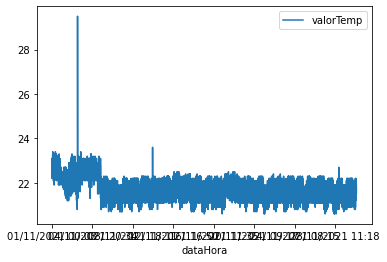

In [5]:
(tabela
 .dropna()
 .sort_values(by="dataHora")
 .plot(x="dataHora", y="valorTemp")
);

<br>
<h3>Verifcando os registros com temperatura acima de 23°C

In [6]:
tabela[tabela.valorTemp >23]

,dataHora,ponto,valorTemp
2,01/11/2021 00:17,RACK01,23.1
7,01/11/2021 00:48,RACK01,23.1
11,01/11/2021 01:13,RACK01,23.1
15,01/11/2021 01:35,RACK01,23.1
17,01/11/2021 01:45,RACK01,23.3
...,...,...,...
1100,05/11/2021 04:52,RACK01,23.1
1161,05/11/2021 09:58,RACK01,23.2
1199,05/11/2021 13:22,RACK01,23.1
2485,10/11/2021 16:39,RACK01,23.4


<br>
<h3>Gráfico com a temperatura acima de 23°C

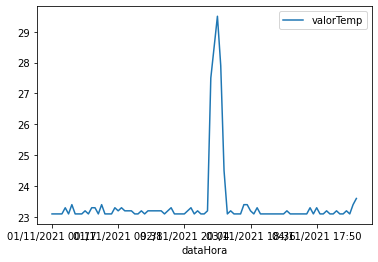

In [7]:
(tabela[tabela.valorTemp >23]
 .dropna()
 .sort_values(by="dataHora")
 .plot(x="dataHora", y="valorTemp")
);

<br>
<h3>Seleção dos valores mais altos de temperatura

In [34]:
tabela.nlargest(5, "valorTemp")

,dataHora,ponto,valorTemp
631,03/11/2021 11:04,RACK01,29.5
630,03/11/2021 10:59,RACK01,28.5
632,03/11/2021 11:08,RACK01,27.9
629,03/11/2021 10:55,RACK01,27.5
633,03/11/2021 11:13,RACK01,24.5


<br>
<h3>Análise dos valores de temperatura

Todos os valores

<AxesSubplot:xlabel='valorTemp', ylabel='Density'>

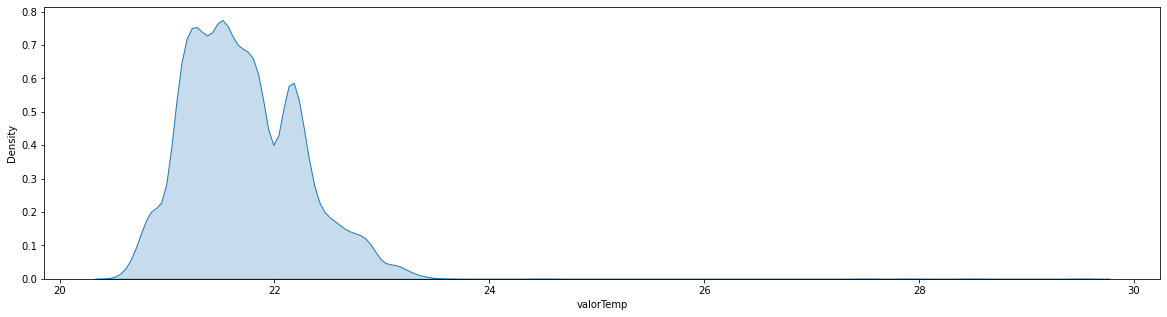

In [42]:
fig,ax=plt.subplots(1,figsize=(20,5))
sns.kdeplot(tabela.loc[tabela['valorTemp'] > 0,'valorTemp'],shade=True,ax=ax,label='Temperatura')

Valores acima de 23°C

<AxesSubplot:xlabel='valorTemp', ylabel='Density'>

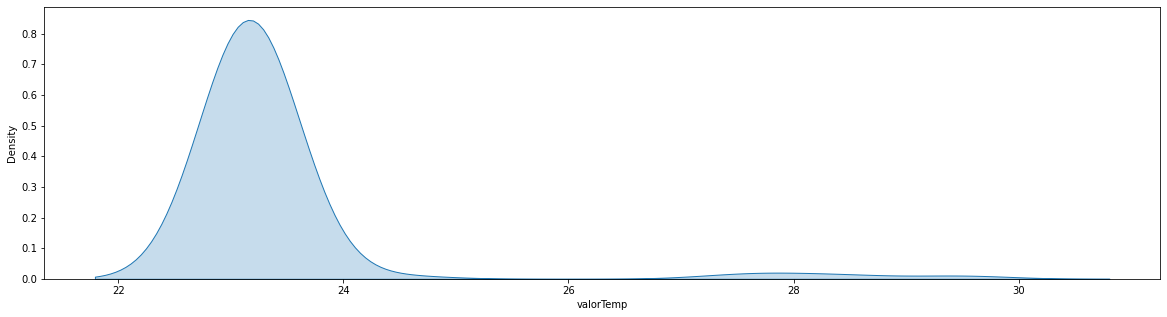

In [41]:
fig,ax=plt.subplots(1,figsize=(20,5))
sns.kdeplot(tabela.loc[tabela['valorTemp'] > 23,'valorTemp'],shade=True,ax=ax,label='Temperatura')